In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./glass.csv")
data.describe()
cols = ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]

Plik z danymi składa się z informacji o indeksie refrakcji danego typu szkła, składzie szkła (z jakich pierwiastków się składa), oraz typie szkła - jego zastosowaniu.
Szkło jest wykonane w różnym stopniu z następujących pierwiastków: magnezu, aluminium, krzemu, potasu, wapna, baru i żelaza. 
Typy szkła to: przetworzone szkło budowlane typu float (building_windows_float_processed), przetworzone szkło budowlane typu nonfloat (building_windows_non_float_processed),
przetworzone szkło dla pojazdów float (vehicle_windows_float_processed), pojemników (containers), zastawy stołowej (tableware), reflektorów (headlamps). 
Typ oznaczony jako 4 nie występuje w bazie danych.

<AxesSubplot:>

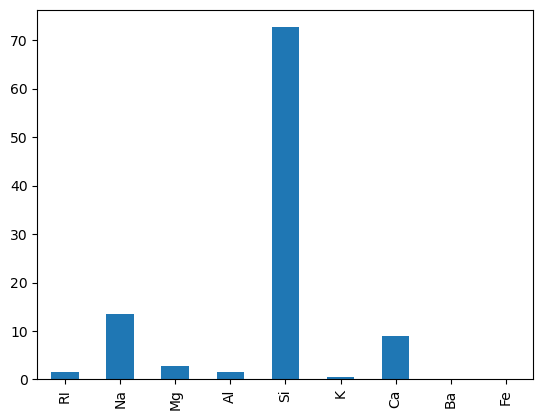

In [19]:
#Wykres zawartości poszczególnych pierwiastków
data_mean = data.drop(columns=["RI"],axis = 1)
data_mean = data.drop(columns=["Type"],axis = 1)
data_mean = data_mean.mean()
data_mean.plot.bar()

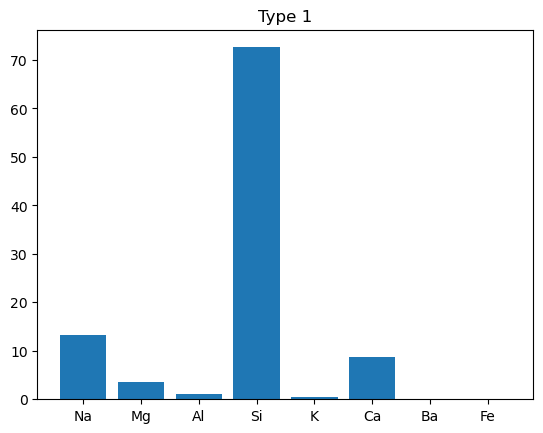

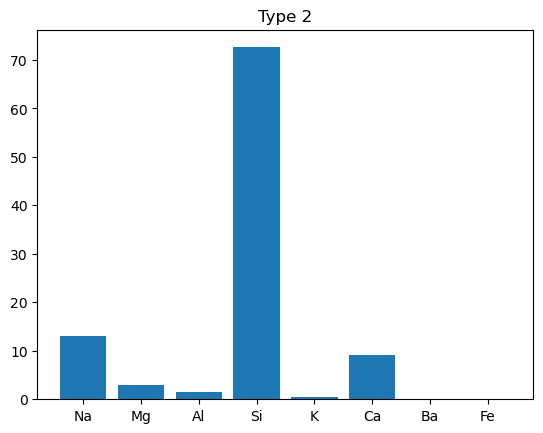

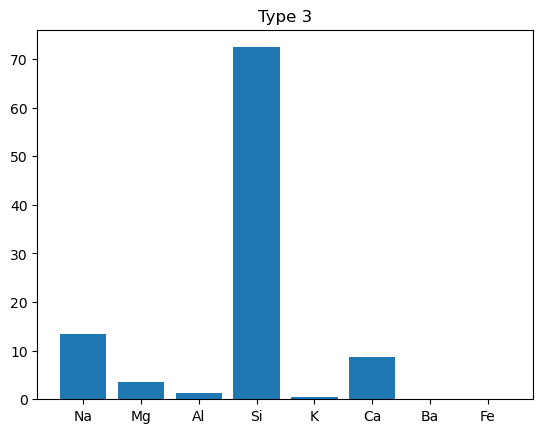

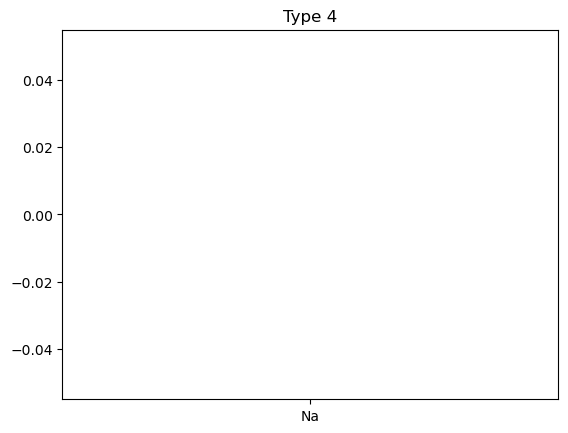

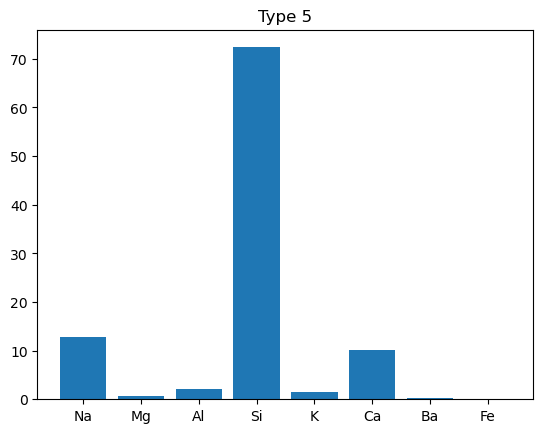

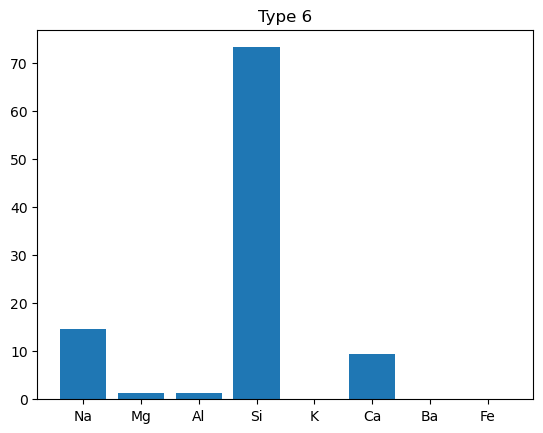

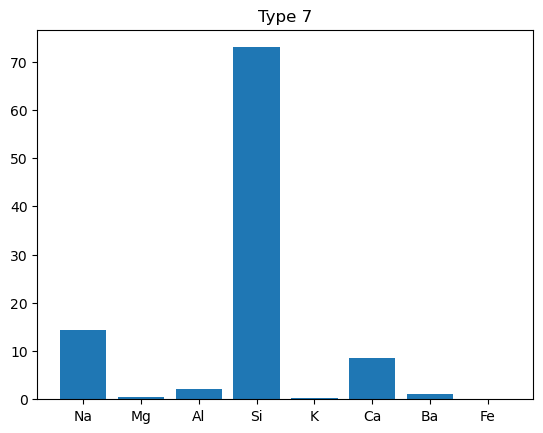

In [20]:
#Zawartość poszczególnych pierwiastków różnych typach szkła
data1 = data.drop(columns=["RI"],axis = 1)
x_values = ["Na","Mg","Al","Si","K","Ca","Ba","Fe"]
for i in range(1,8):
    data_plot = data1.loc[data['Type'] == i]
    data_plot = data_plot.drop(columns=["Type"],axis = 1)
    data_plot = data_plot.mean()
    y_values = data_plot.tolist()
    plt.title(f'Type {i}')
    plt.bar(x_values,y_values)
    plt.show()
#    data_plot.plot.bar()


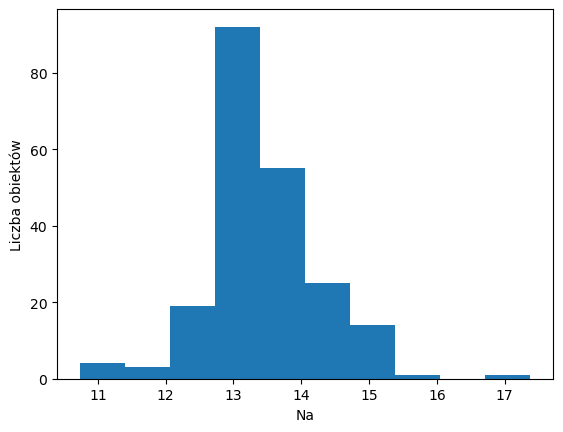

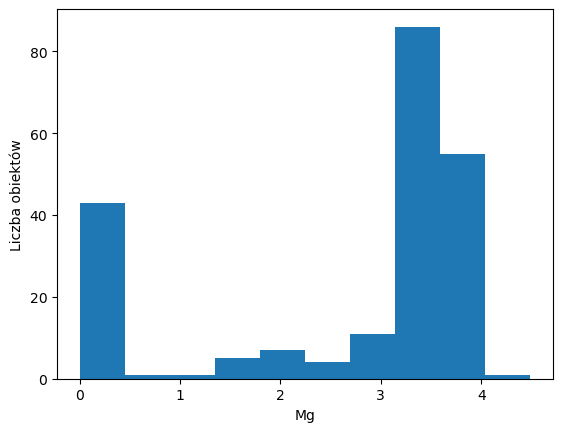

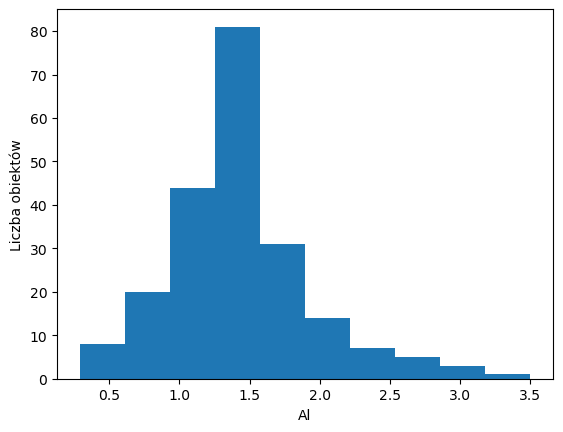

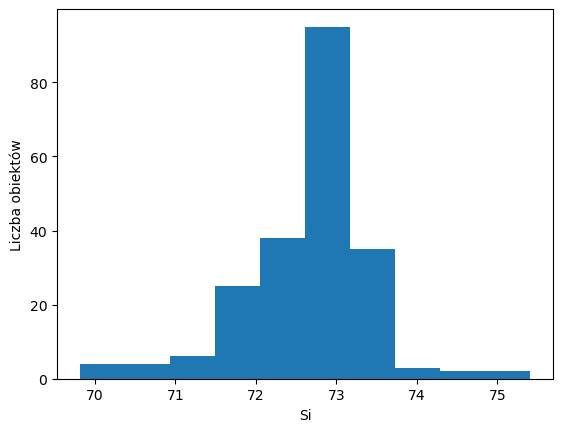

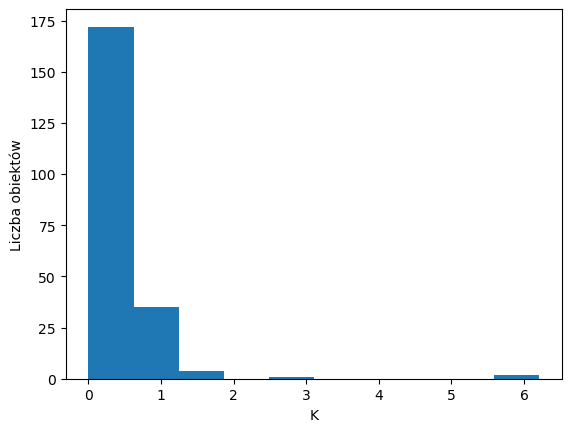

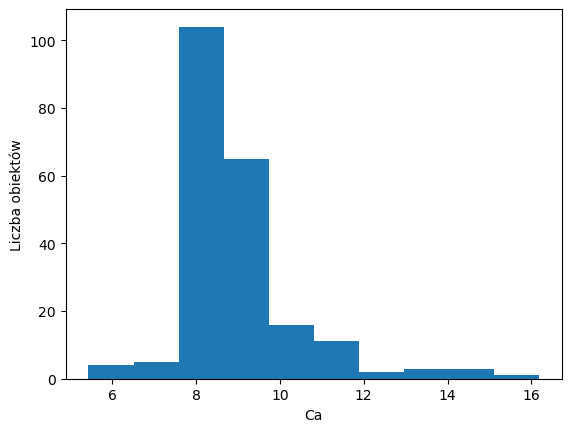

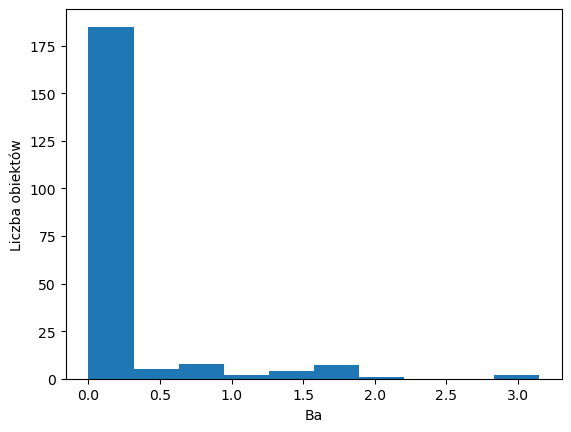

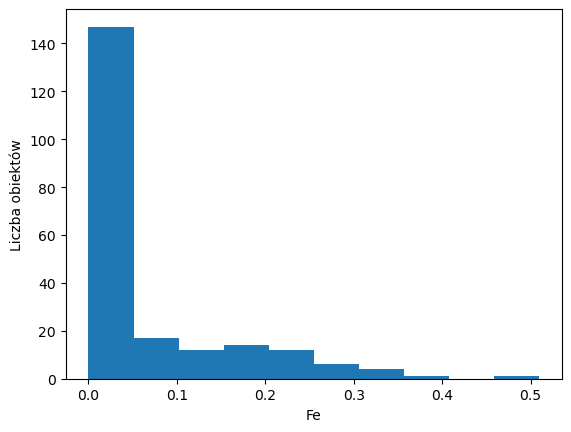

In [21]:
#Liczba obiektów o poszczególnej zawartości 
for i in data[x_values].columns:
    plt.hist(data[x_values][i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('Liczba obiektów')
    plt.show()

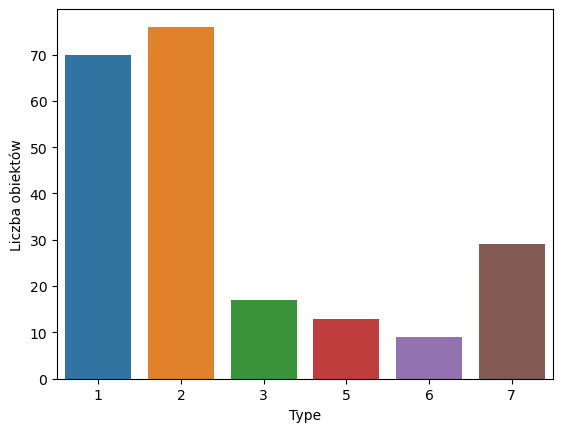

In [22]:
for i in data[['Type']].columns:
    sns.barplot(x=data[['Type']][i].value_counts().index,y=data[['Type']][i].value_counts())
    plt.xlabel(i)
    plt.ylabel('Liczba obiektów')
    plt.show()

<AxesSubplot:>

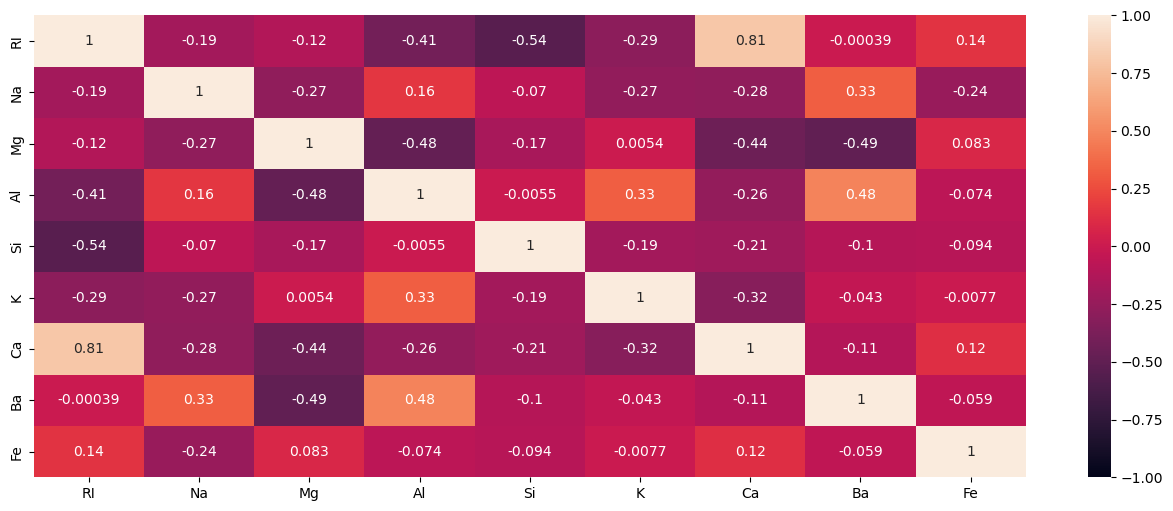

In [23]:
plt.figure(figsize=(16, 6))
sns.heatmap(data[cols].corr(method='pearson'), vmin=-1, vmax=1, annot=True)

Jak widać największa korelacja pierwiastków jest między  Mg i Ba (-0,49) oraz Al i Mg (-0,48) oraz współczynnik RI i pierwiastka Ca (0,81) i Si(-0,54)

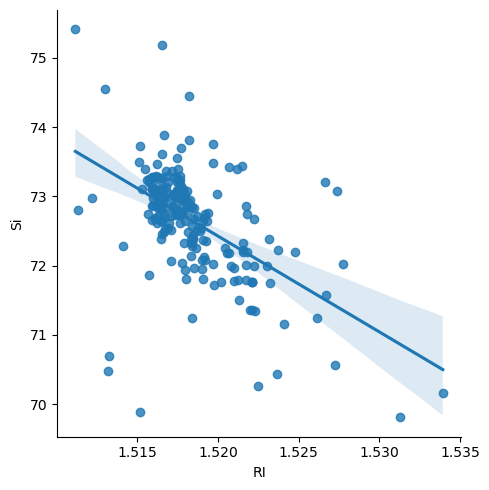

In [24]:
#Wykres najbardziej skorelowanych zmiennych
sns.lmplot(x='RI', y='Si', data=data)
plt.show()